In [1]:
import os
import sys
import scipy.stats

import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import function

from importlib import reload
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import classification_report  
from sklearn.linear_model import LogisticRegression
from scipy.signal import butter, filtfilt
from scipy.signal import detrend
from scipy.signal import find_peaks

plt.style.use('ggplot')

In [2]:
base_path = os.getcwd()
base_path = base_path.replace('notebooks', 'scripts') # note: if you have notebooks twice in your base_path, this won't work
sys.path.insert(1, base_path)

from helpers import *
from utils import remove_top_right_frame, jitter_scatterplot
from function import *

In [3]:
main_dir =  r"C:\Users\user\Desktop\EPFL\MA1\projet_cellular\neuro_circuit"
#main_dir = r"C:/Users/maxca/Documents/EPFL/Computational_neuro/BIO482_MiniProject_2023_Python"
print('Main working directory:', main_dir)
figure_path = os.path.join(main_dir, 'Figures')
os.makedirs(figure_path, exist_ok=True)
data_path = os.path.join(main_dir, 'Data') #if your folder is organized differently, just specify the full path to the .mat file

fname = 'data_bio482-002.plk'
data_df = pd.read_pickle(os.path.join(data_path, fname))

Main working directory: C:\Users\user\Desktop\EPFL\MA1\projet_cellular\neuro_circuit


In [4]:
# Select the relevant columns from data_df and assign them to cells_df
cells_df = data_df[['Cell_ID', 'Cell_Type', 'Cell_APThreshold_Slope', 'Cell_Depth', 'Cell_Layer', 'Cell_TargetedBrainArea', 'Sweep_MembranePotential']]
sampling_rate = 20000

In [5]:
cell = 17
noisy_cell = 5

# Extracting data for a specific cell from the DataFrame
Vm = cells_df['Sweep_MembranePotential'].iloc[cell]  # Get membrane potential for the cell at index 'cell'
#deriv_thresh = cells_df['Cell_APThreshold_Slope'].iloc[cell]  # Get action potential threshold slope for the same cell

# Extracting similar data for another cell, referred to as 'noisy_cell'
Vm2 = cells_df['Sweep_MembranePotential'].iloc[noisy_cell]  # Get membrane potential for the cell at index 'noisy_cell'
#deriv_thresh2 = cells_df['Cell_APThreshold_Slope'].iloc[noisy_cell]  # Get action potential threshold slope for 'noisy_cell'

In [13]:
reload(function)

<module 'function' from 'c:\\Users\\user\\Desktop\\EPFL\\MA1\\projet_cellular\\neuro_circuit\\function.py'>

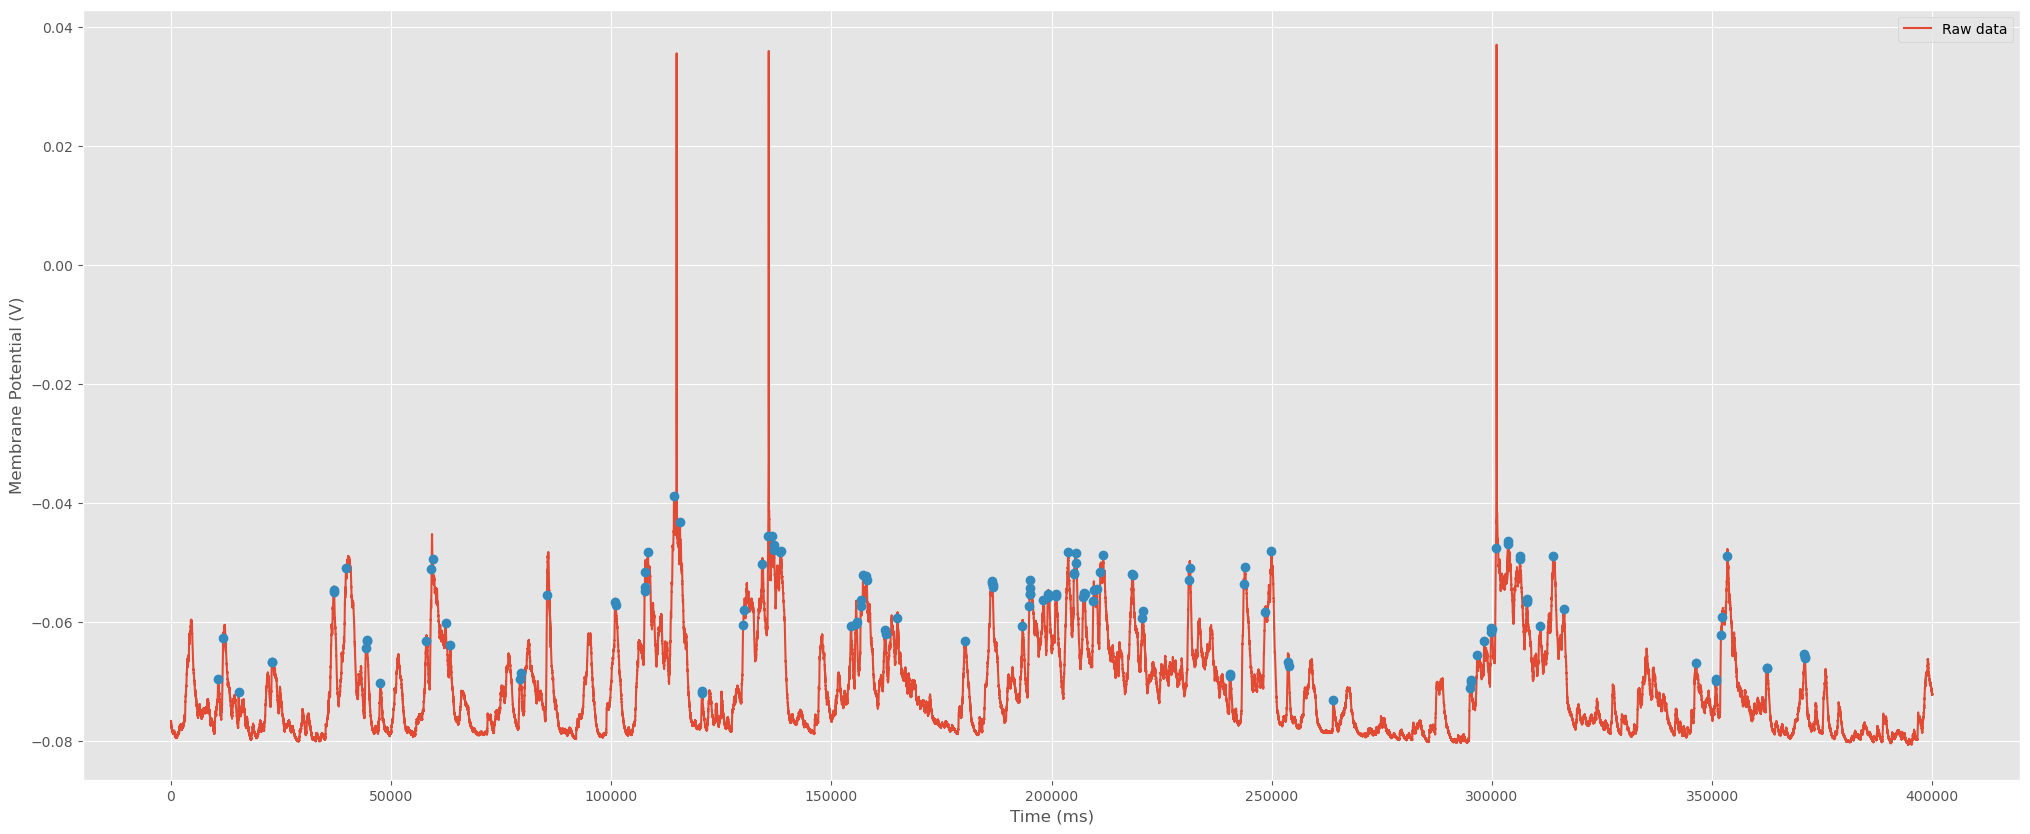

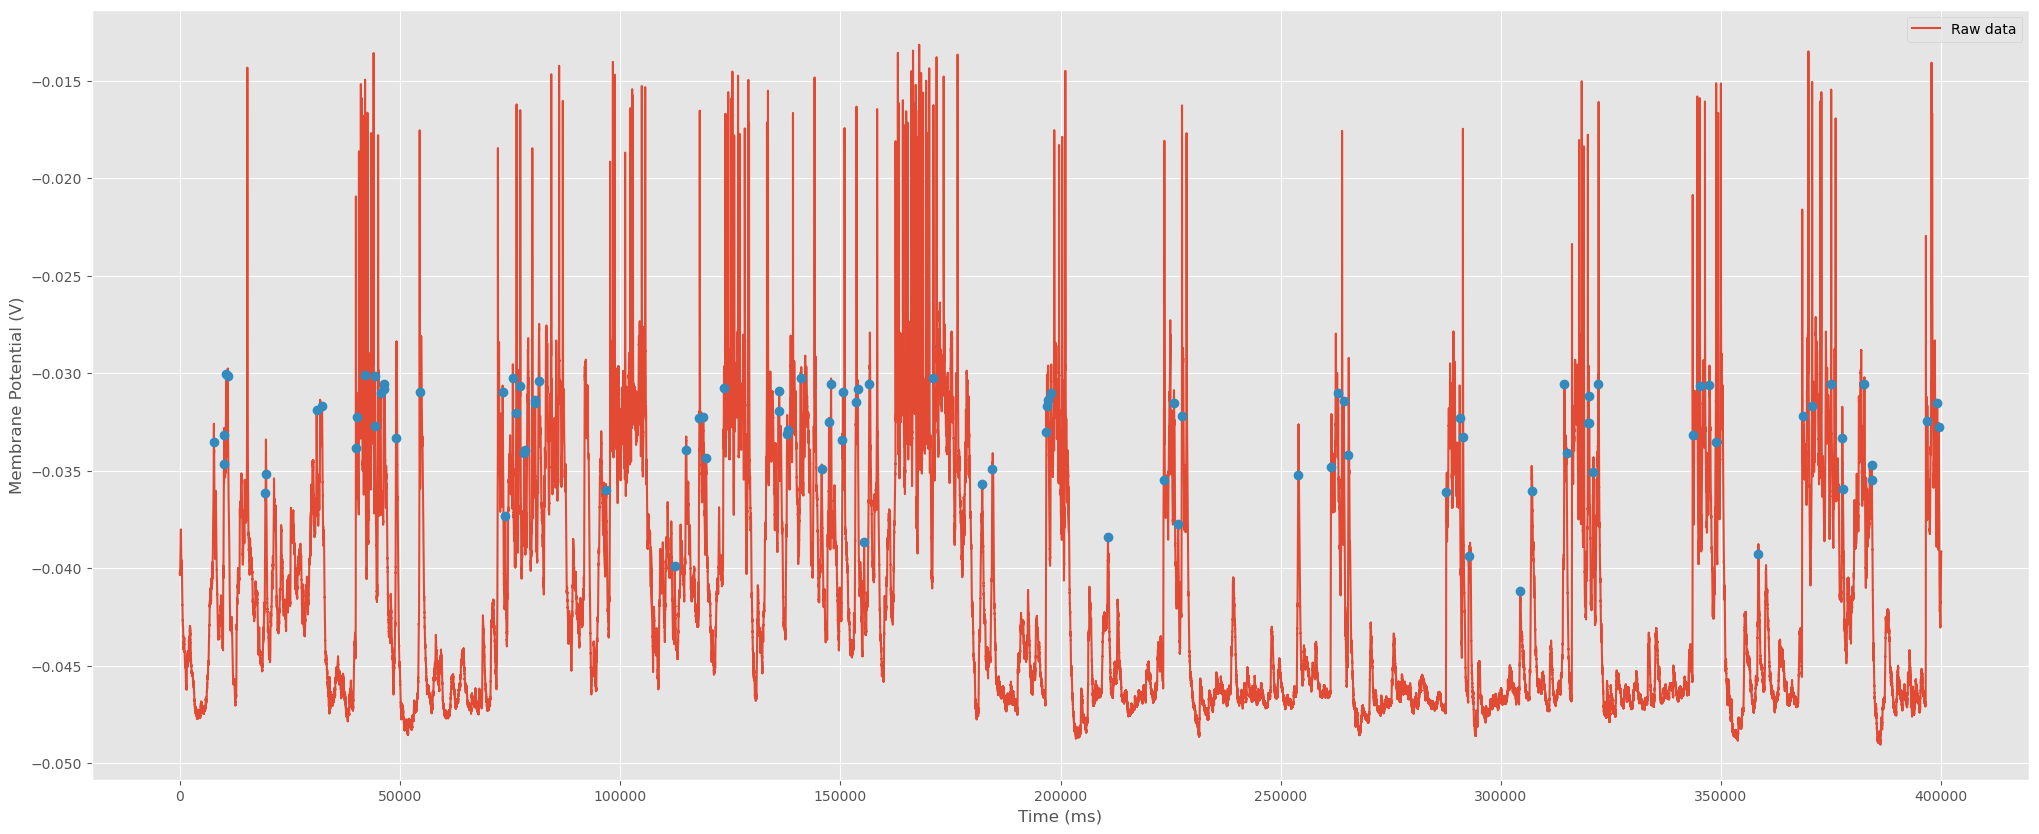

In [6]:
reload(function)
lower_threshold = lower_bound(Vm, mvg_avg_window = 2000, sub_window_size=20000)
upper_threshold = 0.004
window_size = 900

spikelet_params, spikelet_indices = find_spikelet_moving_avg(Vm, window_size=window_size, lower_threshold=lower_threshold, SR_Vm=sampling_rate)
spikelet_testplot(Vm, spikelet_indices) 

spikelet_params2, spikelet_indices2 = find_spikelet_moving_avg(Vm2, window_size=window_size, lower_threshold=lower_threshold, SR_Vm=sampling_rate)
spikelet_testplot(Vm2, spikelet_indices2)

In [7]:
reload(function)

spikelet_params3, spikelet_indices3=find_spikelet_moving_avg(data_df['Sweep_MembranePotential'].iloc[5], sampling_rate, 10)
display(cells_df.head(1), df_spikelet_converter(spikelet_params3))


,Cell_ID,Cell_Type,Cell_APThreshold_Slope,Cell_Depth,Cell_Layer,Cell_TargetedBrainArea,Sweep_MembranePotential
0,SC901_1,EXC,10.0,229.0,L2/3,C2,"[-0.044009375, -0.044028125, -0.0439875, -0.04..."


,spikelet_thresh_times,spikelet_thresh_vm,spikelet_peak_times,spikelet_peak_vm,spikelet_amp
0,0.76610,-0.022400,0.76620,-0.015809,0.006591
1,1.99895,-0.028581,1.99900,-0.024728,0.003853
2,2.03355,-0.023688,2.03360,-0.020837,0.002850
3,2.05530,-0.023044,2.05540,-0.016791,0.006253
4,2.06475,-0.023484,2.06485,-0.017375,0.006109
...,...,...,...,...,...
98,18.75045,-0.020481,18.75050,-0.017678,0.002803
99,18.80120,-0.022550,18.80125,-0.019550,0.003000
100,19.82610,-0.030553,19.82620,-0.024481,0.006072
101,19.89020,-0.018241,19.89025,-0.015800,0.002441


In [9]:
reload(function)
spikelet_summary_df = cells_df.apply(calculate_spikelet_params, axis=1)

,nbr_spikelets,avg_spikelet_duration,avg_spikelet_amp,avg_spikelet_thresh_vm,avg_consecutive_spikelet_interval
0,246.0,0.000372,0.000097,-0.037037,0.806739
1,314.0,0.000389,0.000133,-0.037274,0.598717
2,276.0,0.000420,0.000211,-0.034660,0.715058
3,501.0,0.000430,0.000387,-0.032777,0.398082
4,462.0,0.000374,0.000161,-0.034555,0.406127
...,...,...,...,...,...
826,577.0,0.000389,0.000097,-0.053738,0.345234
827,665.0,0.000383,0.000103,-0.053130,0.300873
828,571.0,0.000383,0.000109,-0.052832,0.349078
829,503.0,0.000339,0.000078,-0.053604,0.396603


In [10]:
spikelet_summary_df.describe()

,nbr_spikelets,avg_spikelet_duration,avg_spikelet_amp,avg_spikelet_thresh_vm,avg_consecutive_spikelet_interval
count,831.000000,831.000000,831.000000,831.000000,831.000000
mean,1576.802647,0.000326,0.000167,-0.050644,0.536167
std,1384.295906,0.000092,0.000235,0.006107,1.275416
min,19.000000,0.000056,0.000005,-0.068118,0.051087
25%,579.500000,0.000265,0.000044,-0.054392,0.189266
50%,1235.000000,0.000320,0.000081,-0.050479,0.311517
75%,2026.500000,0.000389,0.000194,-0.046534,0.452276
max,11741.000000,0.000493,0.002723,-0.031528,25.001842
